In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

from config import Config
from dataloader import DataLoader
from data_processor import DataProcessor

In [15]:
config = Config(
    **{
        "threshold_nspots": 10,
        "labeling_method": "angle",
        "threshold_angle": 30,  # degrees
        "threshold_speed": 1,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : ["filter_nspots", "interpolate_missing_frames", "add_distance_to_next_point", "sort_by_track_and_frame", "compute_speed"]
    }
)
folder_path = Path("data/Trypton-0P1_1") 
dataloading = DataLoader(folder_path)
spot_df = dataloading.load_spot_data()
dp = DataProcessor(spot_df, config)

Filtering tracks with nspots < 10
 Starting spot_df size: 24667
 Filtered spot_df size: 22714
Interpolating missing frames
Interpolated 265 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
Number of tracks: 322.0
Number of tracks with more than 100 spots: 57.0
Number of spots: 22979.0
Mean speed: 19.64 µm/s


In [16]:
dp.label_tracks()

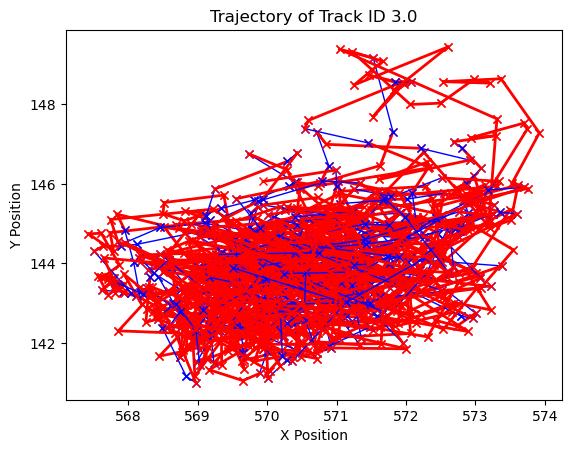

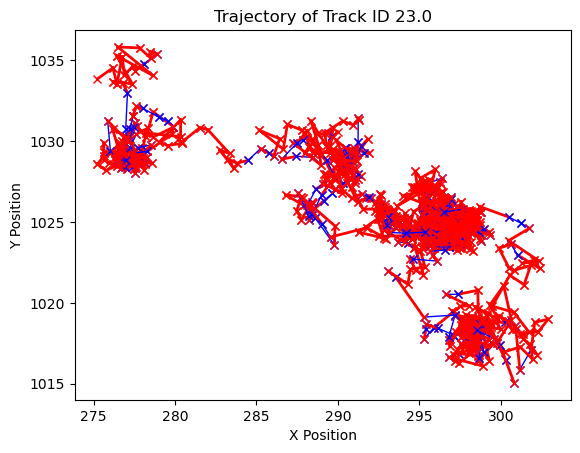

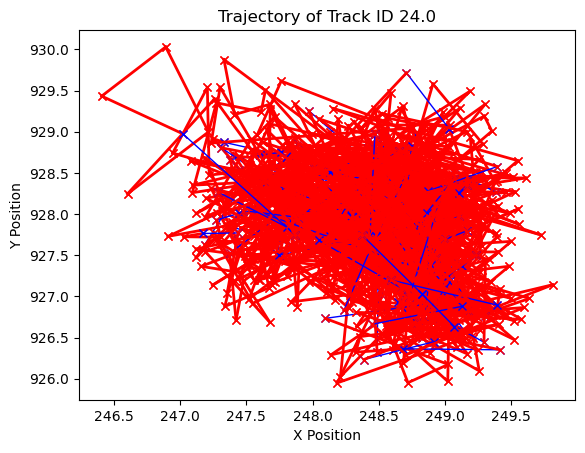

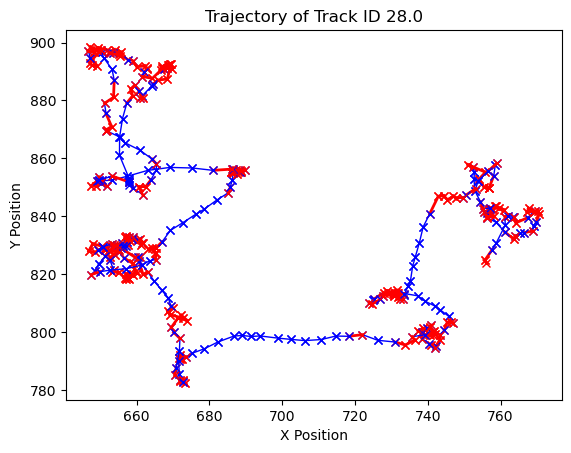

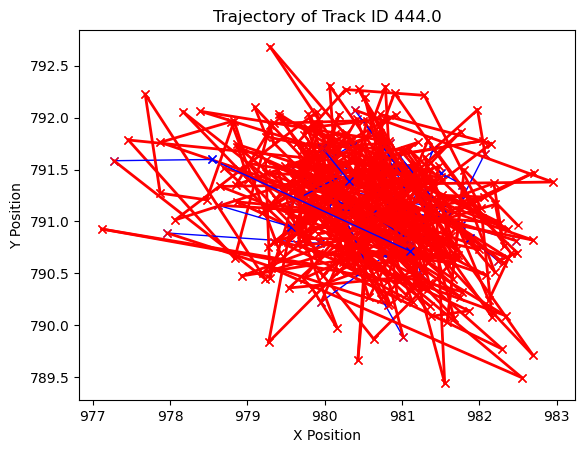

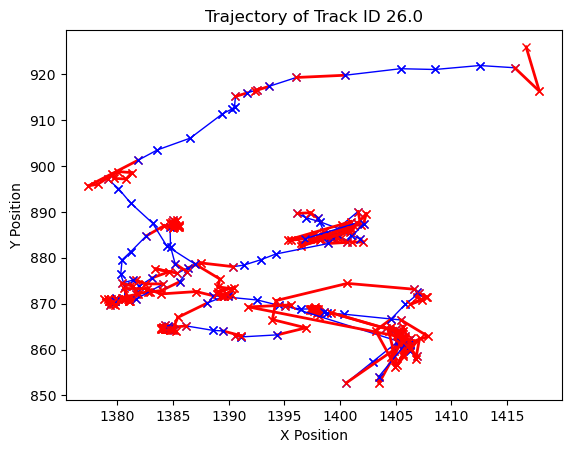

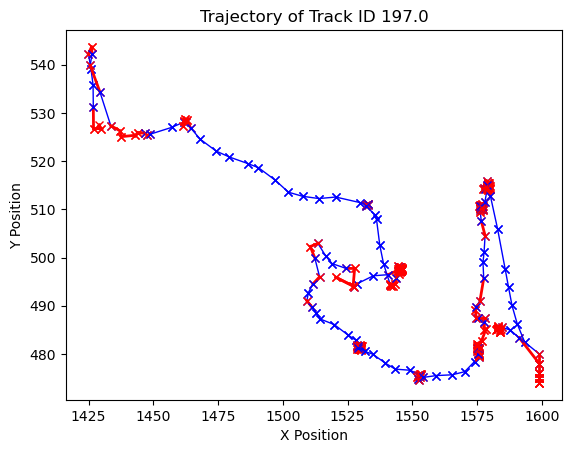

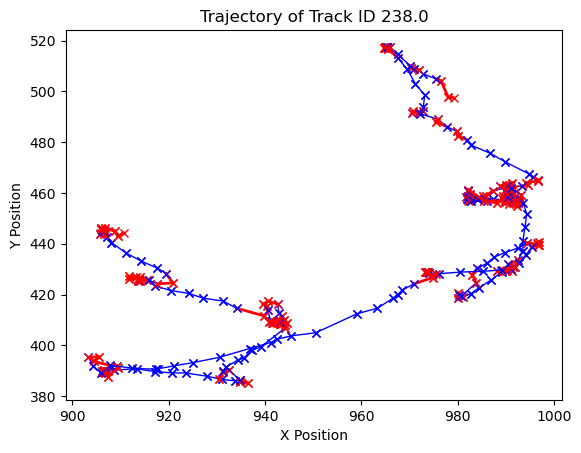

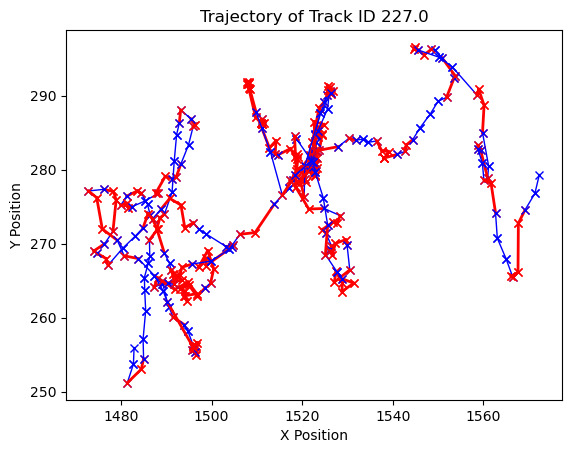

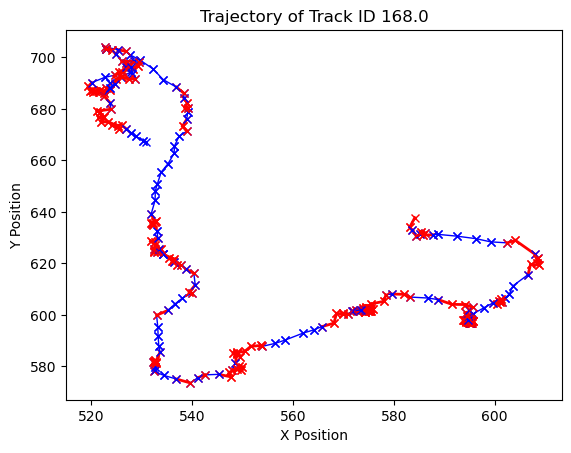

In [17]:
for track_id in dp.list_longest:
    dp.plotter.plot_run_tumble(track_id)